# WeRateDogs Data Wrangling Insight

Twitter provides lots of nice features and even makes it possible to collaborate to build a topics specific group where lots of likeminded people and sometimes animals show off themselves. So as WeRateDogs do, a Twitter account that rates people's dogs in a most creative fashion. On outstanding thing is the unusual rating of overestimating or like shooting to the star rating by mostly giving ratings like 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." (Meme) WeRateDogs has over 4 million followers and has received international media coverage.

Udacity provided all necessary data from twitter and also the possibility to enrich the dataset by using the tweepy API to get more updated data from twitter.
Before it was possible to give some insights or answer question about it, data had to be gathered, assessed and finally cleaned.
After all the tedious and exhausting part; ending up with one clean dataset was a relieve and now coming up with some basic question about the dataset and the group participants.

**Info about the dataset**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1685 non-null   int64  
 1   timestamp                      1685 non-null   object 
 2   text                           1685 non-null   object 
 3   expanded_urls                  1685 non-null   object 
 4   rating_numerator               1685 non-null   int64  
 5   rating_denominator             1685 non-null   int64  
 6   name                           1685 non-null   object 
 7   jpg_url                        1685 non-null   object 
 8   img_num                        1685 non-null   float64
 9   created_at                     1685 non-null   object 
 10  id_str                         1685 non-null   float64
 11  full_text                      1685 non-null   object 
 12  truncated                      1685 non-null   b

So, there are about 1684 datasamples in 23 different features.

**What devices do users tweet from?**

In [17]:
df.device.value_counts()

Twitter for iPhone    1654
Twitter Web Client      22
TweetDeck                9
Name: device, dtype: int64

It seems that most of the users are iPhone fans.

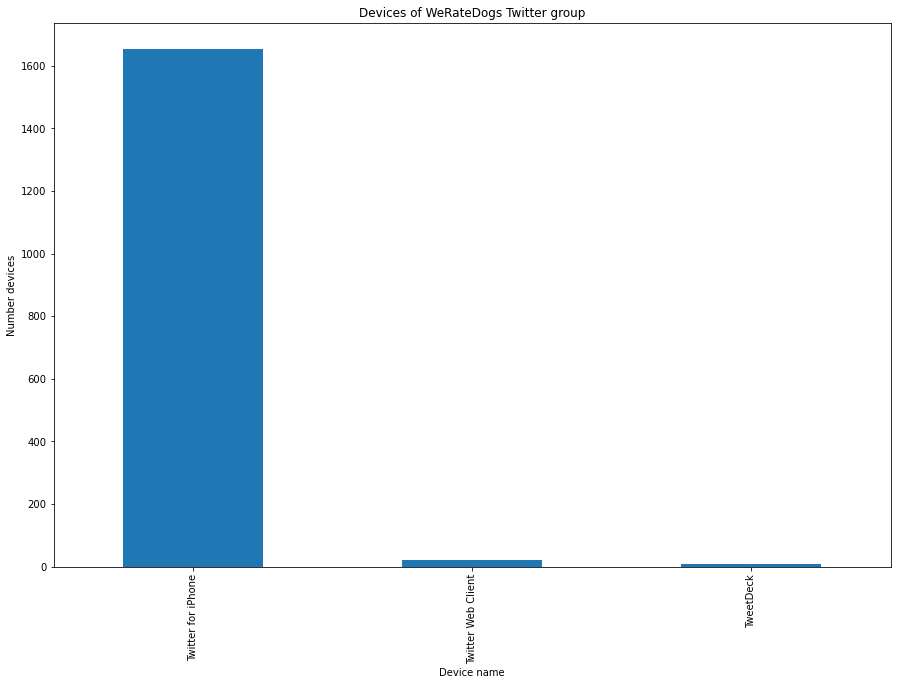

In [21]:
plt.figure(figsize = (15,10))
plt.title('Devices of WeRateDogs Twitter group')
plt.ylabel('Number devices')
plt.xlabel('Device name')
df.device.value_counts().plot.bar()
plt.savefig("devices.jpg")

**What are the top 10 favorites?**

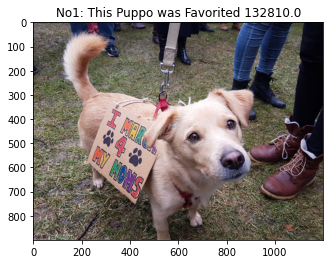

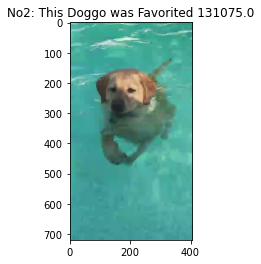

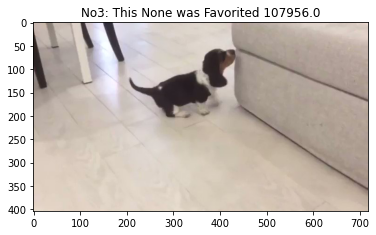

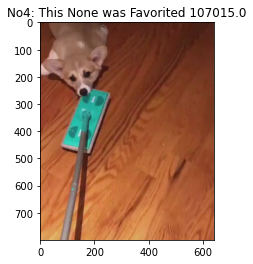

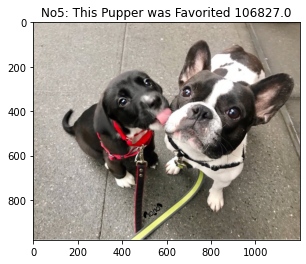

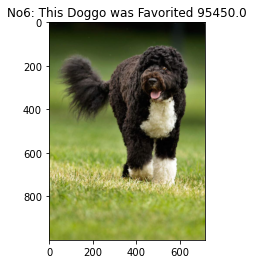

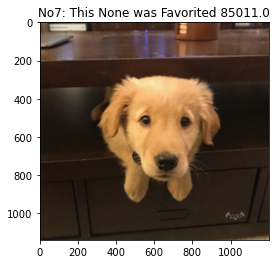

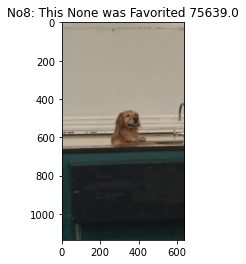

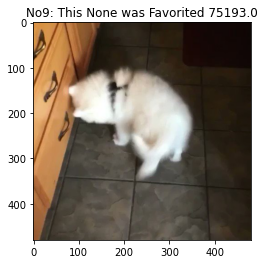

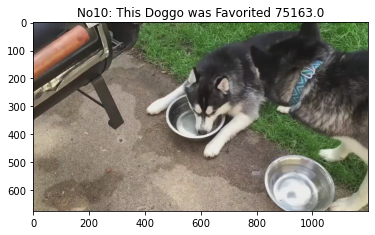

In [19]:
favorites = df.iloc[df.favorite_count.sort_values(ascending = False)[:10].index].reset_index()
i = 0
for url, dog, count in zip(favorites.jpg_url.values, favorites.dogtionary.values, favorites.favorite_count.values):
    i += 1
    img = plt.imread(url, format = 'jpg')
    plt.figure()
    plt.title(f"No{i}: This {dog} was Favorited {count}")
    plt.imshow(img)
    plt.savefig(f"fav{i}.jpg")

**What are the top 10 retweeted tweets?**

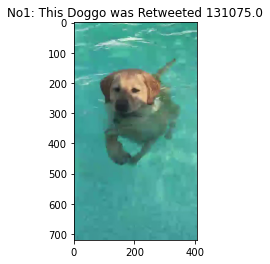

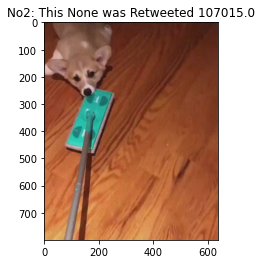

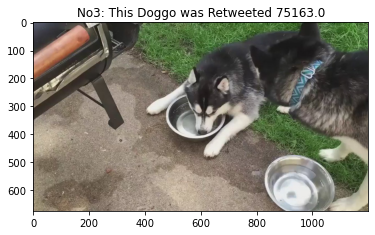

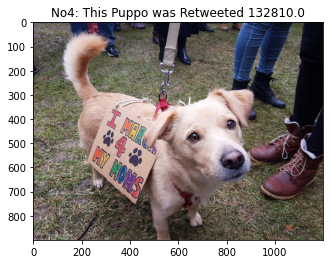

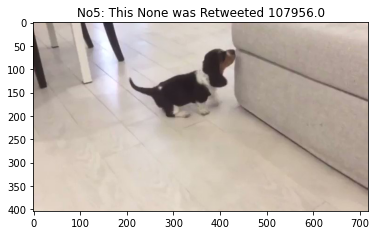

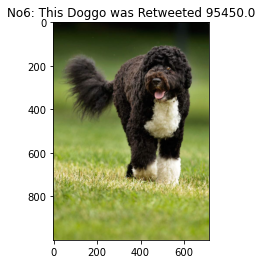

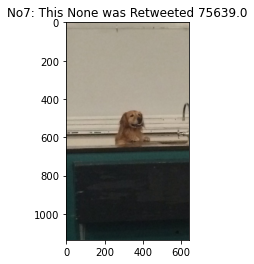

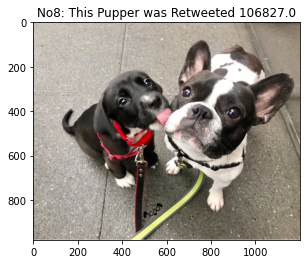

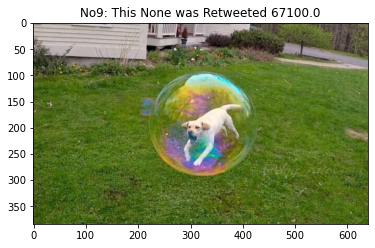

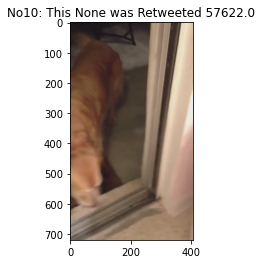

In [20]:
i = 0
retweets = df.iloc[df.retweet_count.sort_values(ascending = False)[:10].index]
for url, dog, count in zip(retweets.jpg_url.values, retweets.dogtionary.values, retweets.favorite_count.values):
    i += 1
    img = plt.imread(url, format = 'jpg')
    plt.figure()
    plt.title(f"No{i}: This {dog} was Retweeted {count}")
    plt.imshow(img)
    plt.savefig(f"ret{i}.jpg")

**What day of the week and time of the day to people tweet the most?**

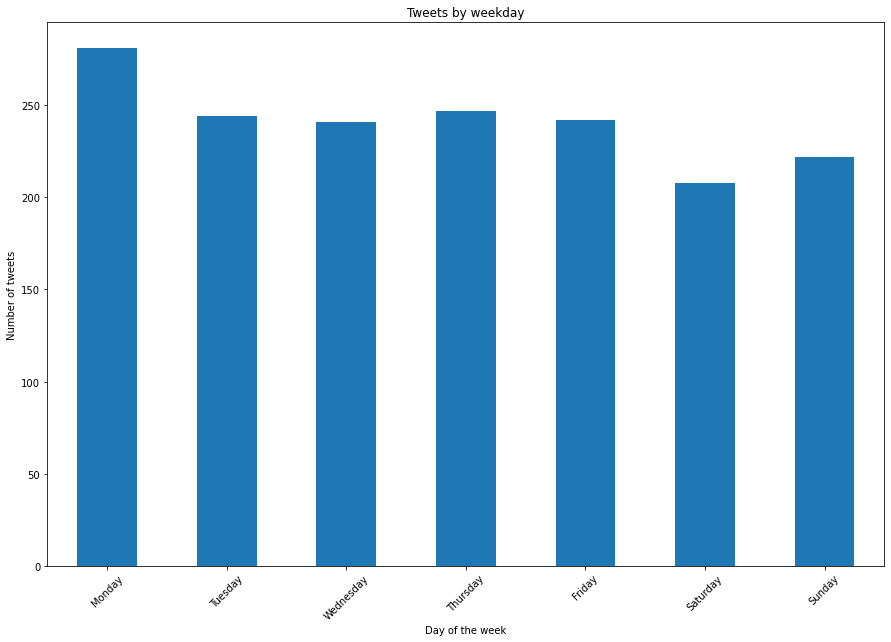

In [22]:
from datetime import datetime
plt.figure(figsize = (15,10))
plt.title('Tweets by weekday')
plt.xlabel('Day of the week')
plt.ylabel('Number of tweets')
ax = df.timestamp.apply(lambda str_: datetime.strptime(str_, '%Y-%m-%d %H:%M:%S').weekday()).value_counts().sort_index().plot.bar()
ax.set_xticks(range(7))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.savefig("weekday.jpg")

It is common sense that people normally have more time for twitter stuff during the free time... Surprisingly peak tweet day is monday and little less on weekends compared to the average on during the week.

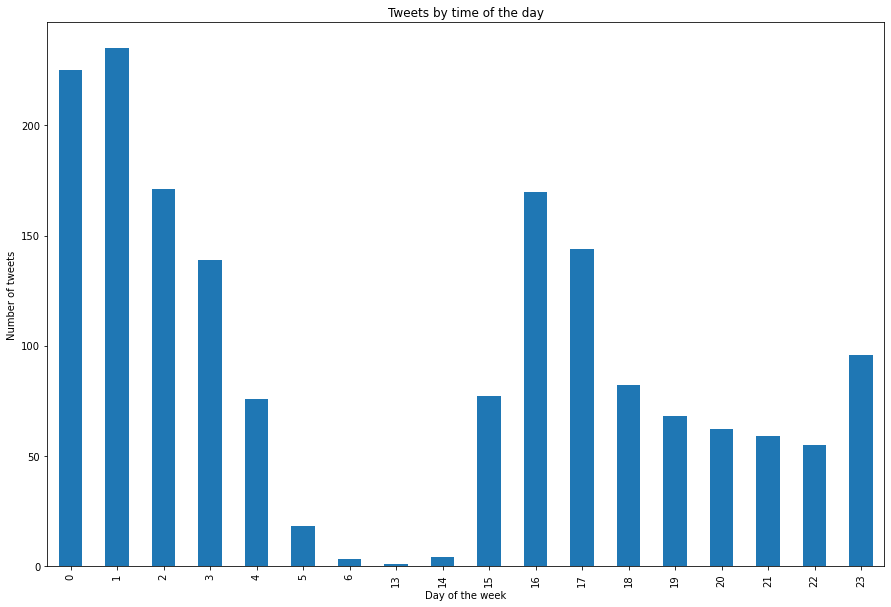

In [23]:
plt.figure(figsize = (15,10))
plt.title('Tweets by time of the day')
plt.xlabel('Day of the week')
plt.ylabel('Number of tweets')
df.timestamp.apply(lambda str_: datetime.strptime(str_, '%Y-%m-%d %H:%M:%S').hour).value_counts().sort_index().plot.bar()
plt.savefig("time.jpg")

The peak tweet time is at 0 and 1 in the morning... Which is GMT and for the US that might be around 4 and 5 pm. Besides that during brunch time there are some smaller peaks as well. What is striking as well is, that there are 7 hours of no tweeting at all.

**The top 10 dog names (after no-name)**

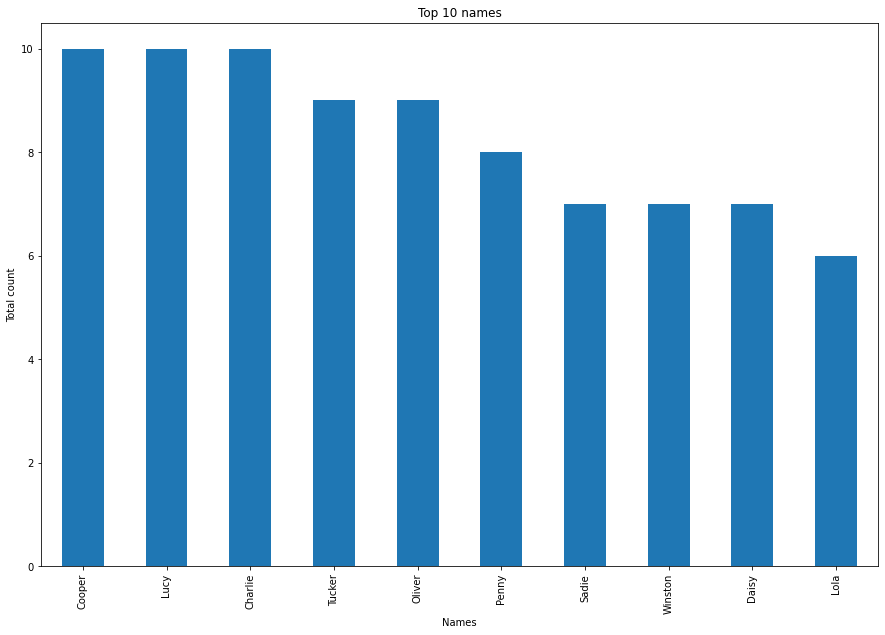

In [24]:
plt.figure(figsize = (15,10))
plt.title('Top 10 names')
plt.xlabel('Names')
plt.ylabel('Total count')
df.name.value_counts()[1:11].plot.bar()
plt.savefig("topnames.jpg")